# YouTube Trending Videos Statistical Analysis

## INTRODUCTION

#### to be edited</b>
<b>https://www.kaggle.com/rsrishav/youtube-trending-video-dataset

In [1]:
# Importing libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp

%matplotlib inline

In [2]:
'''
Later on we can also remove the ones we wouldn't use
'''
# Importing dataset
data_gb = pd.read_csv("../data/GB_youtube_trending_data.csv",sep=",")  #uk  
data_fr = pd.read_csv("../data/FR_youtube_trending_data.csv",sep=",")  #france
data_us = pd.read_csv("../data/US_youtube_trending_data.csv",sep=",")  #usa 
data_ru = pd.read_csv("../data/RU_youtube_trending_data.csv",sep=",")  #russia
data_de = pd.read_csv("../data/DE_youtube_trending_data.csv",sep=",")  #germany 
data_ca = pd.read_csv("../data/CA_youtube_trending_data.csv",sep=",")  #canada   
data_kr = pd.read_csv("../data/KR_youtube_trending_data.csv",sep=",")  #southkorea   
data_jp = pd.read_csv("../data/JP_youtube_trending_data.csv",sep=",")  #japan
data_br = pd.read_csv("../data/BR_youtube_trending_data.csv",sep=",")  #brazil
data_mx = pd.read_csv("../data/MX_youtube_trending_data.csv",sep=",")  #mexico

                                       **INDIVIDUAL PARTS**

### Data Cleaning & Wrangling

In [3]:
'''
Adding json files
'''
gb_json = pd.read_json('../data/GB_category_id.json')
fr_json = pd.read_json('../data/FR_category_id.json')
us_json = pd.read_json('../data/US_category_id.json')
ru_json = pd.read_json('../data/RU_category_id.json')
de_json = pd.read_json('../data/DE_category_id.json')
ca_json = pd.read_json('../data/CA_category_id.json')
kr_json = pd.read_json('../data/KR_category_id.json')
jp_json = pd.read_json('../data/JP_category_id.json')
br_json = pd.read_json('../data/BR_category_id.json')
mx_json = pd.read_json('../data/MX_category_id.json')

In [4]:
'''
Defining function to flat json files to get rid of dictionary format for every country
'''

col_list = ["items","items_snippet"]

def flat_func(df,column):
    for column in col_list:
        flatten = pd.DataFrame(dict(df[column])).transpose()
        columns = [str(i) for i in flatten.columns]
        flatten.columns = [column + "_" + str(colname) for colname in columns]
        df = pd.concat([df,flatten],axis=1)
        df = df.drop(column,axis=1)
    return df

In [5]:
'''
Applying function
Creating flat databases
'''

gb_flat = flat_func(gb_json,col_list)[["items_id","items_snippet_title"]]
fr_flat = flat_func(fr_json,col_list)[["items_id","items_snippet_title"]]
us_flat = flat_func(us_json,col_list)[["items_id","items_snippet_title"]]
ru_flat = flat_func(ru_json,col_list)[["items_id","items_snippet_title"]]
de_flat = flat_func(de_json,col_list)[["items_id","items_snippet_title"]]
ca_flat = flat_func(ca_json,col_list)[["items_id","items_snippet_title"]]
kr_flat = flat_func(kr_json,col_list)[["items_id","items_snippet_title"]]
jp_flat = flat_func(jp_json,col_list)[["items_id","items_snippet_title"]]
br_flat = flat_func(br_json,col_list)[["items_id","items_snippet_title"]]
mx_flat = flat_func(mx_json,col_list)[["items_id","items_snippet_title"]]

In [6]:
'''
Dropping categoryId 29 for each country
'''

data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

def category_remover(country):
    drop_idx = country[country["categoryId"]==29].index
    return drop_idx

data_gb = data_gb.drop(category_remover(data_gb))
data_fr = data_fr.drop(category_remover(data_fr))
data_us = data_us.drop(category_remover(data_us))
data_ru = data_ru.drop(category_remover(data_ru))
data_de = data_de.drop(category_remover(data_de))
data_ca = data_ca.drop(category_remover(data_ca))
data_kr = data_kr.drop(category_remover(data_kr))
data_jp = data_jp.drop(category_remover(data_jp))
data_br = data_br.drop(category_remover(data_br))
data_mx = data_mx.drop(category_remover(data_mx))

In [7]:
'''
Creating function to add trend name next to categoryId for every country
'''
def trend_adder(country_df,country_flat):
    trend = []
    for trend_id in country_df["categoryId"]:
        for i in range(0,len(country_flat)):
            if trend_id == int(country_flat["items_id"][i]):
                trend.append(country_flat["items_snippet_title"][i])

    country_df.insert(6,"trend",trend)     

In [8]:
'''
Applying Function
Adding trend column next to categoryId for every country
'''
trend_order_data_country = [data_gb,data_fr,data_us,data_ru,data_de,
                            data_ca,data_kr,data_jp,data_br,data_mx]

trend_order_data_flat = [gb_flat,fr_flat,us_flat,ru_flat,de_flat,
                         ca_flat,kr_flat,jp_flat,br_flat,mx_flat]

for i in range(0,len(trend_order_data_country)):
    trend_adder(trend_order_data_country[i],trend_order_data_flat[i])

In [9]:
'''
Scrapping the most updated row for each link.

Not the best way but kinda stuck while trying to retrieve local variables from function so this will
give us what we want for now..
'''
def get_recent_idx(country):
    latest_idx = []
    for link in np.array(country["video_id"].unique()):
        latest_row = country[(country["video_id"] ==
                                      link)][["view_count"]].nlargest(1,"view_count").index[0]
    
        latest_idx.append(latest_row)
    return country[country.index.isin(latest_idx)]
   
data_gb_unique = get_recent_idx(data_gb)
data_fr_unique = get_recent_idx(data_fr)
data_us_unique = get_recent_idx(data_us)
data_ru_unique = get_recent_idx(data_ru)
data_de_unique = get_recent_idx(data_de)
data_ca_unique = get_recent_idx(data_ca)
data_kr_unique = get_recent_idx(data_kr)
data_jp_unique = get_recent_idx(data_jp)
data_br_unique = get_recent_idx(data_br)
data_mx_unique = get_recent_idx(data_mx)

### Data Visualization

In [10]:
'''
Setting plot parameters.
'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (14,7)

Text(0.5, 1.0, 'Correlation Heatmap of UK')

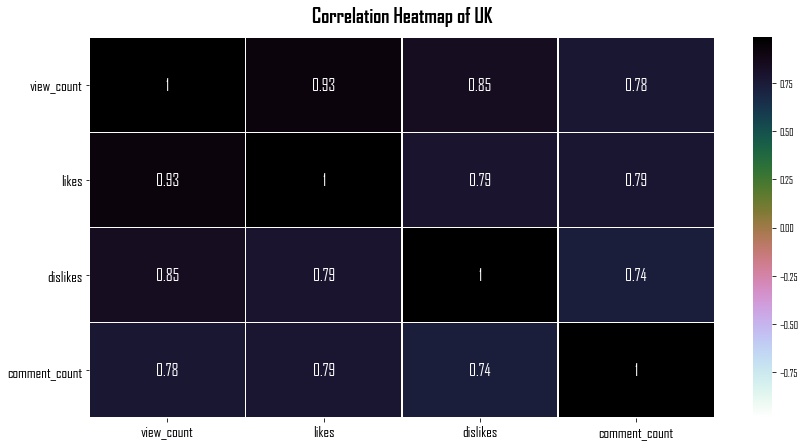

In [11]:
'''
Creating correlation heatmap.
'''
data_gb_numerical = data_gb_unique[["view_count","likes","dislikes","comment_count"]]

sns.heatmap(data_gb_numerical.corr(),annot=True,annot_kws={"size": 16},
            vmin=-0.99,vmax=0.99,cbar=True,linewidth=0.5, cmap="cubehelix_r")
plt.xticks(size=15)
plt.yticks(rotation=0,size=15)
plt.title("Correlation Heatmap of UK",size=20,fontweight="bold",pad=15)

In [12]:
'''
Creating Pivot Table Function (categorized_pivot_table)

- Will be applied for each country
- Will be used for visaulization

'''
data_unique_countries = [data_gb_unique,data_fr_unique,data_us_unique,data_ru_unique,
                         data_de_unique,data_ca_unique,data_kr_unique,data_jp_unique
                         ,data_br_unique,data_mx_unique]

def categorized_pivot_table(df):
    
    categorized_pivot_table = pd.pivot_table(df,values=(
        "view_count","likes","dislikes","comment_count",),index="trend")
    return categorized_pivot_table

In [13]:
'''
Creating Pivot Table Function (pivot_table_country_comparison)
- Will be used to compare country attributes
'''

def pivot_table_country_comparison(df):
    return lambda data: pd.pivot_table(df,values=("comment_count","view_count","likes","dislikes"
                                                 ),index="trend").sort_values(by="likes",ascending
                                                                              ="False")
# Applying function

pt_gb = pivot_table_country_comparison(data_gb_unique)
pt_fr = pivot_table_country_comparison(data_fr_unique)
pt_us = pivot_table_country_comparison(data_us_unique)
pt_ru = pivot_table_country_comparison(data_ru_unique)
pt_de = pivot_table_country_comparison(data_de_unique)
pt_ca = pivot_table_country_comparison(data_ca_unique)
pt_kr = pivot_table_country_comparison(data_kr_unique)
pt_jp = pivot_table_country_comparison(data_jp_unique)
pt_br = pivot_table_country_comparison(data_br_unique)
pt_mx = pivot_table_country_comparison(data_mx_unique)

# Calling lambda function

pv_table = pivot_table_country_comparison(data_gb_unique)

# Applying lambda function

pt_gb = pt_gb(pv_table)
pt_fr = pt_fr(pv_table)
pt_us = pt_us(pv_table)
pt_ru = pt_ru(pv_table)
pt_de = pt_de(pv_table)
pt_ca = pt_ca(pv_table)
pt_kr = pt_kr(pv_table)
pt_jp = pt_jp(pv_table)
pt_br = pt_br(pv_table)
pt_mx = pt_mx(pv_table)

# Renaming columns & adding suffix (view_count_UK,likes_UK,dislikes_Mexico etc..)

plot_titles_countries = ["UK","France","USA","Russia","Germany","Canada",
                         "SouthKorea","Japan","Brazil","Mexico"]


pt_gb.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[0]),
                      "view_count":("view_count" + "_" + plot_titles_countries[0]),
                     "likes":("likes" + "_" + plot_titles_countries[0]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[0])},
             inplace=True)

pt_fr.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[1]),
                      "view_count":("view_count" + "_" + plot_titles_countries[1]),
                     "likes":("likes" + "_" + plot_titles_countries[1]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[1])},
             inplace=True)

pt_us.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[2]),
                      "view_count":("view_count" + "_" + plot_titles_countries[2]),
                     "likes":("likes" + "_" + plot_titles_countries[2]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[2])},
             inplace=True)

pt_ru.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[3]),
                      "view_count":("view_count" + "_" + plot_titles_countries[3]),
                     "likes":("likes" + "_" + plot_titles_countries[3]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[3])},
             inplace=True)

pt_de.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[4]),
                      "view_count":("view_count" + "_" + plot_titles_countries[4]),
                     "likes":("likes" + "_" + plot_titles_countries[4]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[4])},
             inplace=True)

pt_ca.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[5]),
                      "view_count":("view_count" + "_" + plot_titles_countries[5]),
                     "likes":("likes" + "_" + plot_titles_countries[5]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[5])},
             inplace=True)

pt_kr.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[6]),
                      "view_count":("view_count" + "_" + plot_titles_countries[6]),
                     "likes":("likes" + "_" + plot_titles_countries[6]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[6])},
             inplace=True)

pt_jp.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[7]),
                      "view_count":("view_count" + "_" + plot_titles_countries[7]),
                     "likes":("likes" + "_" + plot_titles_countries[7]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[7])},
             inplace=True)

pt_br.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[8]),
                      "view_count":("view_count" + "_" + plot_titles_countries[8]),
                     "likes":("likes" + "_" + plot_titles_countries[8]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[8])},
             inplace=True)

pt_mx.rename(columns={"comment_count":("comment_count" + "_" + plot_titles_countries[9]),
                      "view_count":("view_count" + "_" + plot_titles_countries[9]),
                     "likes":("likes" + "_" + plot_titles_countries[9]),
                     "dislikes":("dislikes" + "_" + plot_titles_countries[9])},
             inplace=True)

# Merging columns to create df_final

import functools
from functools import reduce

dfs = [pt_gb, pt_fr, pt_us,pt_ru,pt_de,pt_ca,pt_kr,pt_jp,pt_br,pt_mx]
df_final = reduce(lambda left,right: pd.merge(left,right,how="outer",
                                              left_index=True,right_index=True), dfs)

In [14]:
df_final

,comment_count_UK,dislikes_UK,likes_UK,view_count_UK,comment_count_France,dislikes_France,likes_France,view_count_France,comment_count_USA,dislikes_USA,...,likes_Japan,view_count_Japan,comment_count_Brazil,dislikes_Brazil,likes_Brazil,view_count_Brazil,comment_count_Mexico,dislikes_Mexico,likes_Mexico,view_count_Mexico
trend,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,4575.526316,778.947368,55992.649123,9.810114e+05,1320.228261,289.282609,29653.641304,3.066545e+05,4771.063830,812.617021,...,35653.340426,7.343580e+05,3215.789474,525.157895,90141.736842,8.507521e+05,4626.961538,1209.076923,116130.653846,1.298338e+06
Comedy,7289.662069,1427.089655,123807.427586,1.421675e+06,3223.753968,999.341270,87300.043651,8.189324e+05,9749.260274,1727.883562,...,89926.362205,1.572796e+06,6602.217391,1971.054348,160405.728261,1.396310e+06,12797.923810,4953.019048,229313.295238,2.583458e+06
Education,6271.031250,967.078125,75841.265625,1.170114e+06,1226.985294,311.441176,22394.235294,3.162847e+05,6479.456140,1064.877193,...,10724.333333,7.722779e+05,862.723684,279.921053,10417.394737,1.376712e+05,2331.947368,381.631579,21359.157895,3.081597e+05
Entertainment,9759.206774,2467.647059,121840.914439,1.946203e+06,3998.693498,913.431889,65318.947368,7.461962e+05,13630.905830,3276.573991,...,29573.032012,9.096749e+05,6077.642249,1563.136286,103898.451448,1.054185e+06,9144.664516,2637.077419,129151.359140,1.677363e+06
Film & Animation,7786.152778,2155.569444,97469.597222,1.986863e+06,2196.119048,677.000000,31043.261905,7.951914e+05,7112.989362,1997.893617,...,12225.785124,6.144933e+05,5805.380952,1773.000000,101453.619048,1.829373e+06,4627.734694,1787.551020,85998.387755,1.951492e+06
Gaming,10952.930000,3659.450000,120940.440000,2.546376e+06,6516.933333,2852.550000,68887.775000,1.781376e+06,13162.171171,4080.067568,...,35305.603774,1.385355e+06,6285.895522,2299.706468,129779.104478,1.926421e+06,8373.968750,2942.406250,134846.491071,2.018433e+06
Howto & Style,5048.926316,2208.410526,71085.473684,1.205088e+06,997.131579,367.342105,20372.000000,2.517643e+05,6265.524272,2387.271845,...,12997.695652,5.098320e+05,1567.148148,262.222222,23901.703704,2.122914e+05,4647.200000,1222.294118,64260.447059,1.093663e+06
Music,54014.544444,10397.891111,360650.208889,5.192173e+06,33768.639695,7869.716031,269432.445802,3.849957e+06,49754.989130,9877.954710,...,443317.605932,6.360564e+06,31143.892805,6642.631424,256043.330396,3.501716e+06,39189.018676,9334.859083,339465.826825,5.298033e+06
News & Politics,6303.428571,2203.766234,14137.233766,1.028312e+06,1044.154762,270.845238,9498.964286,2.513105e+05,6517.196721,2581.877049,...,4651.384615,7.603587e+05,4236.236842,1524.868421,21958.131579,6.165557e+05,2150.825397,1612.238095,22332.126984,8.884873e+05


In [15]:
'''
Grouping df_final database and creating new databases in order to compare country attributes
Ex: Total likes for each country
Ex: Total dislikes for each country
'''

countries_like_columns = ["likes_UK","likes_France","likes_USA","likes_Russia","likes_Germany",
                          "likes_Canada","likes_SouthKorea","likes_Japan",
                          "likes_Brazil","likes_Mexico"]

countries_dislike_columns = ["dislikes_UK","dislikes_France","dislikes_USA","dislikes_Russia",
                          "dislikes_Germany","dislikes_Canada","dislikes_SouthKorea",
                          "dislikes_Japan","dislikes_Brazil","dislikes_Mexico"]

countries_comment_count_columns = ["comment_count_UK","comment_count_France","comment_count_USA",
                             "comment_count_Russia","comment_count_Germany","comment_count_Canada",
                             "comment_count_SouthKorea","comment_count_Japan",
                                   "comment_count_Brazil","comment_count_Mexico"]

countries_view_count_columns = ["view_count_UK","view_count_France","view_count_USA",
                             "view_count_Russia","view_count_Germany","view_count_Canada",
                             "view_count_SouthKorea","view_count_Japan","view_count_Brazil",
                                "view_count_Mexico"]


countries_like = pd.pivot_table(df_final,values=countries_like_columns,index="trend")
countries_dislike = pd.pivot_table(df_final,values=countries_dislike_columns,index="trend")
countries_comment_count = pd.pivot_table(df_final,values=countries_comment_count_columns,index="trend")
countries_view_count = pd.pivot_table(df_final,values=countries_view_count_columns,index="trend")

In [16]:
'''
-----------------------------------------LIKES------------------------------------------------

Ordering new created database "countries_like" in order to draw graph

'''
# Index ordering
#Summing up total likes in each trend for all countries in order to order graph
total_numbers = []
for i in range(14):
    total_trend = countries_like.iloc[i,:].sum()
    countries_like.index[i]
    total_numbers.append(total_trend)
    total_numbers = sorted(total_numbers,reverse=True)

trend_names = []
for i in range(14):
    for j in range(14):
        if countries_like.iloc[i,:].sum() == total_numbers[j]:
            trend_names.append(countries_like.index[j])
            
'''
Now changing index order based on above calculation in the "countries_like" dataframe
Ex;
1-Music
2-Comedy 
3-Sports etc.
'''

countries_like_ordered = countries_like.reindex(index=trend_names)
countries_like_ordered.head(3)

# Column ordering
'''
Now ordering columns(countries) based on total likes 
'''
total_numbers_cols = []
for i in countries_like:
    total_country_like = countries_like.loc[:,i].sum()
    total_numbers_cols.append(total_country_like)
    total_numbers_cols = sorted(total_numbers_cols,reverse=True)

col_names_ordered = []
for i in range(10):
    for j in countries_like.columns:
        if total_numbers_cols[i] == countries_like.loc[:,j].sum():
            col_names_ordered.append(j)

countries_like_ordered = countries_like_ordered[col_names_ordered]

In [17]:
'''
-----------------------------------------DISLIKES-----------------------------------------------

Ordering new created database "countries_dislike" in order to draw graph

'''

# Index ordering
#Summing up total dislikes in each trend for all countries in order to order graph

total_numbers = []
for i in range(14):
    total_trend = countries_dislike.iloc[i,:].sum()
    countries_dislike.index[i]
    total_numbers.append(total_trend)
    total_numbers = sorted(total_numbers,reverse=True)

trend_names = []
for i in range(14):
    for j in range(14):
        if countries_dislike.iloc[i,:].sum() == total_numbers[j]:
            trend_names.append(countries_dislike.index[j])

'''
Now changing index order based on above calculation in the "countries_dislike" dataframe
Ex;
1-Music
2-Comedy 
3-Sports etc.
'''

countries_dislike_ordered = countries_dislike.reindex(index=trend_names)
countries_dislike_ordered.head(3)


# Column ordering
'''
Now ordering columns(countries) based on total likes 
'''
total_numbers_cols = []
for i in countries_dislike:
    total_country_like = countries_dislike.loc[:,i].sum()
    total_numbers_cols.append(total_country_like)
    total_numbers_cols = sorted(total_numbers_cols,reverse=True)

col_names_ordered = []
for i in range(10):
    for j in countries_dislike.columns:
        if total_numbers_cols[i] == countries_dislike.loc[:,j].sum():
            col_names_ordered.append(j)

countries_dislike_ordered = countries_dislike_ordered[col_names_ordered]

In [18]:
'''
-----------------------------------------VIEW_COUNTS------------------------------------------------

Ordering new created database "countries_view_count" in order to draw graph

'''
# Index ordering
#Summing up total view_count in each trend for all countries in order to order graph
total_numbers = []
for i in range(14):
    total_trend = countries_view_count.iloc[i,:].sum()
    countries_view_count.index[i]
    total_numbers.append(total_trend)
    total_numbers = sorted(total_numbers,reverse=True)

trend_names = []
for i in range(14):
    for j in range(14):
        if countries_view_count.iloc[i,:].sum() == total_numbers[j]:
            trend_names.append(countries_view_count.index[j])
            
'''
Now changing index order based on above calculation in the "countries_view_count" dataframe
Ex;
1-Music
2-Comedy 
3-Sports etc.
'''


countries_view_count_ordered = countries_view_count.reindex(index=trend_names)
countries_view_count.head(3)

# Column ordering
'''
Now ordering columns(countries) based on total likes 
'''
total_numbers_cols = []
for i in countries_view_count:
    total_country_like = countries_view_count.loc[:,i].sum()
    total_numbers_cols.append(total_country_like)
    total_numbers_cols = sorted(total_numbers_cols,reverse=True)

col_names_ordered = []
for i in range(10):
    for j in countries_view_count.columns:
        if total_numbers_cols[i] == countries_view_count.loc[:,j].sum():
            col_names_ordered.append(j)

countries_view_count_ordered = countries_view_count[col_names_ordered]

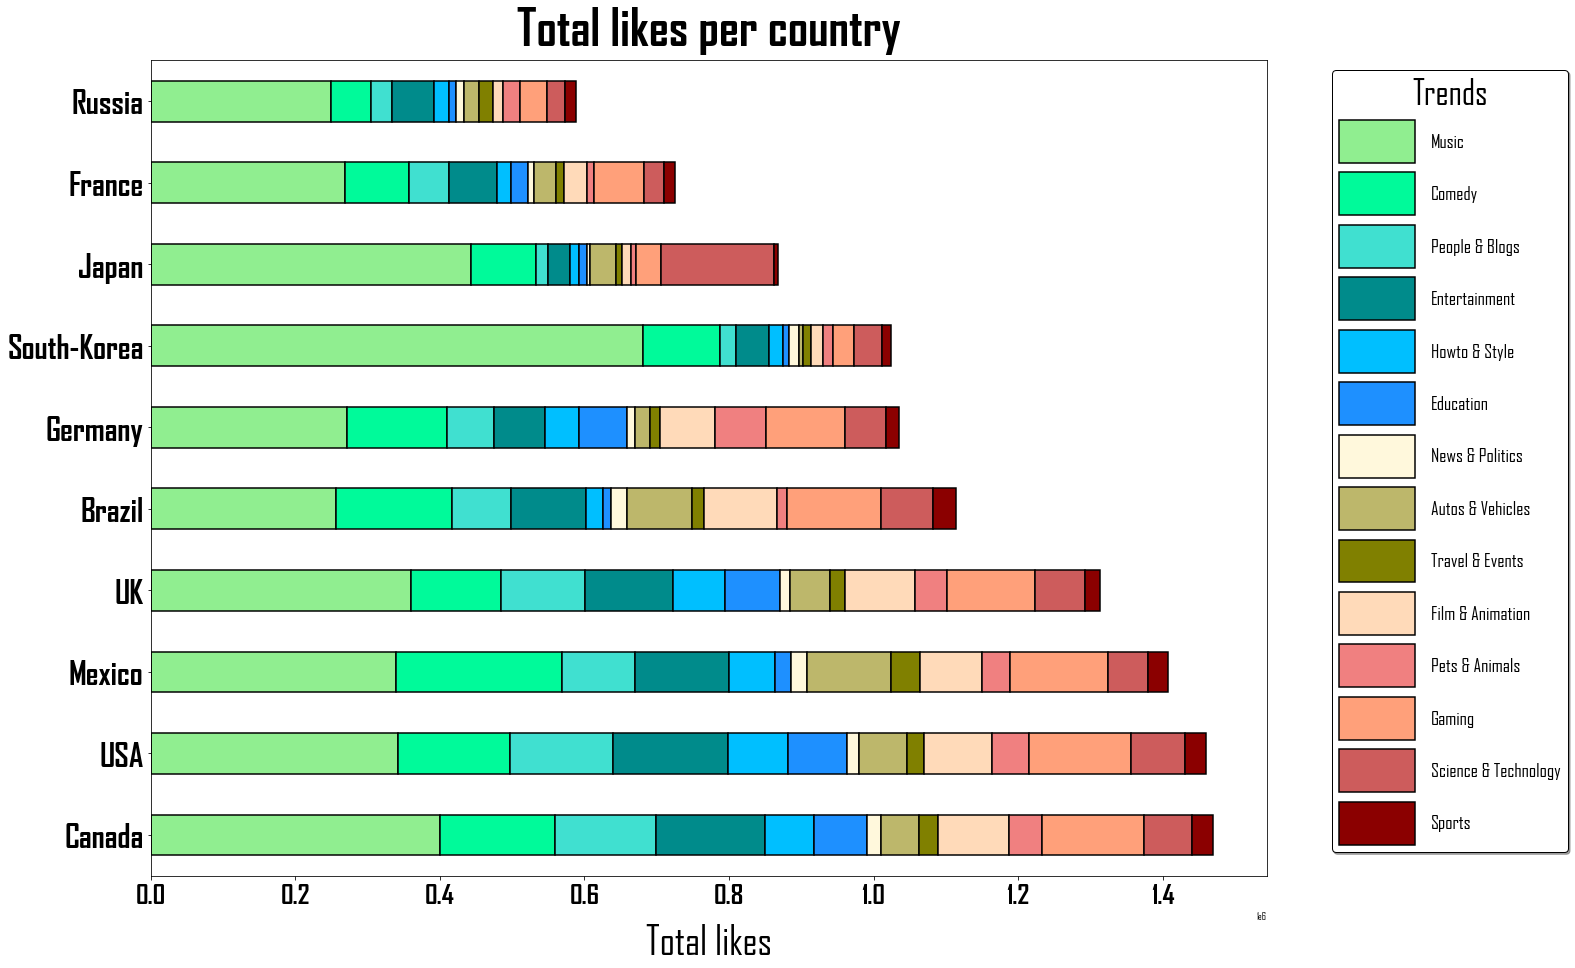

In [19]:
'''
------------------------------Comparing country results - LIKES ----------------------------------
'''

from matplotlib.font_manager import FontProperties

# Setting Parameters
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1
fontP = FontProperties()

#colors = ["palevioletred","teal","sandybrown","burlywood","khaki","olive",
#          "hotpink","aquamarine","lightcoral","slateblue","violet","plum","grey","springgreen"]


colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue",
          "dodgerblue","cornsilk","darkkhaki","olive","peachpuff","lightcoral",
          "lightsalmon","indianred","darkred"]

# This is the dataframe
countries_like_ordered.T.plot(kind="barh",stacked=True,color=colors,linewidth=1.5,edgecolor="k")

# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_likes=["Russia","France","Japan","South-Korea","Germany","Brazil","UK",
                "Mexico","USA","Canada"]

plt.yticks(positions,labels=labels_likes[::-1],size=32,fontweight="bold")
plt.xticks(size=27,fontweight="bold")
plt.title("Total likes per country",size=50,fontweight="bold",pad=15)
plt.xlabel("Total likes",size=40,labelpad=15)
 
# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

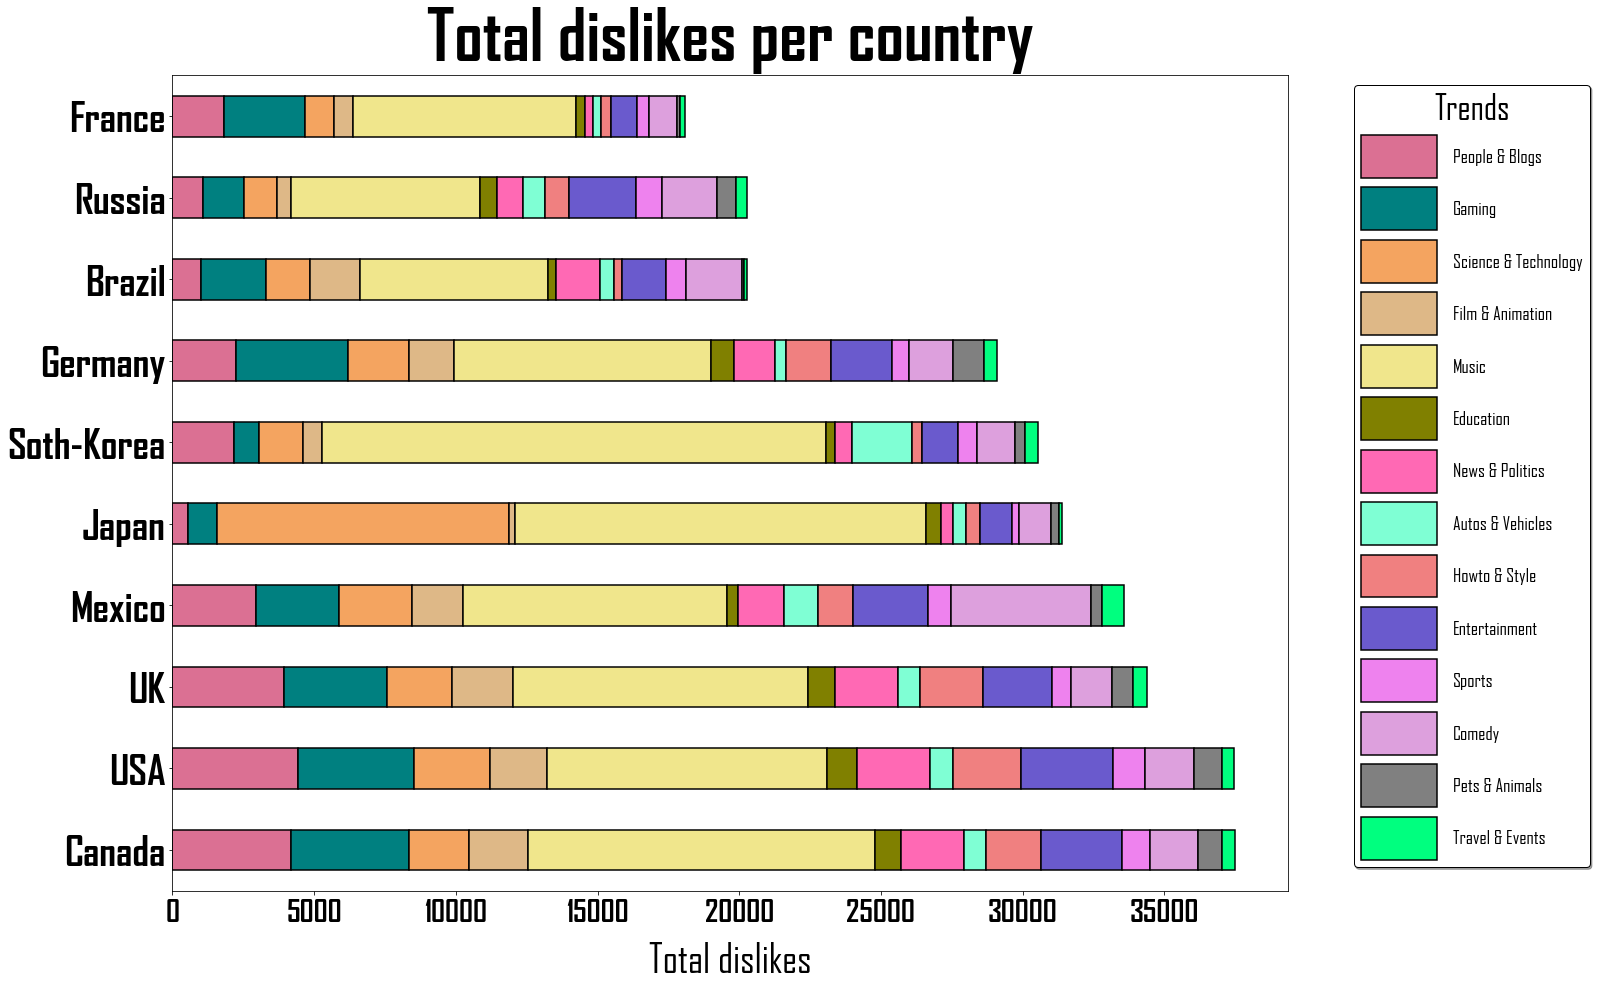

In [20]:
'''
------------------------------Comparing country results - DISLIKES ----------------------------------
'''

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1


colors = ["palevioletred","teal","sandybrown","burlywood","khaki","olive",
          "hotpink","aquamarine","lightcoral","slateblue","violet","plum","grey","springgreen"]


#colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue",
#          "dodgerblue","cornsilk","darkkhaki","olive","peachpuff","lightcoral",
#          "lightsalmon","indianred","darkred"]


# This is the dataframe


countries_dislike_ordered.T.plot(kind="barh",stacked=True,color=colors,linewidth=1.5,edgecolor="k")


# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_dislikes=["Canada","USA","UK","Mexico","Japan","Soth-Korea","Germany",
                "Brazil","Russia","France"]

plt.yticks(positions,labels=labels_dislikes,size=41,fontweight="bold")
plt.xticks(size=30,fontweight="bold")
plt.title("Total dislikes per country",size=70,fontweight="bold",pad=15)
plt.xlabel("Total dislikes",size=40,labelpad=15)
 

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

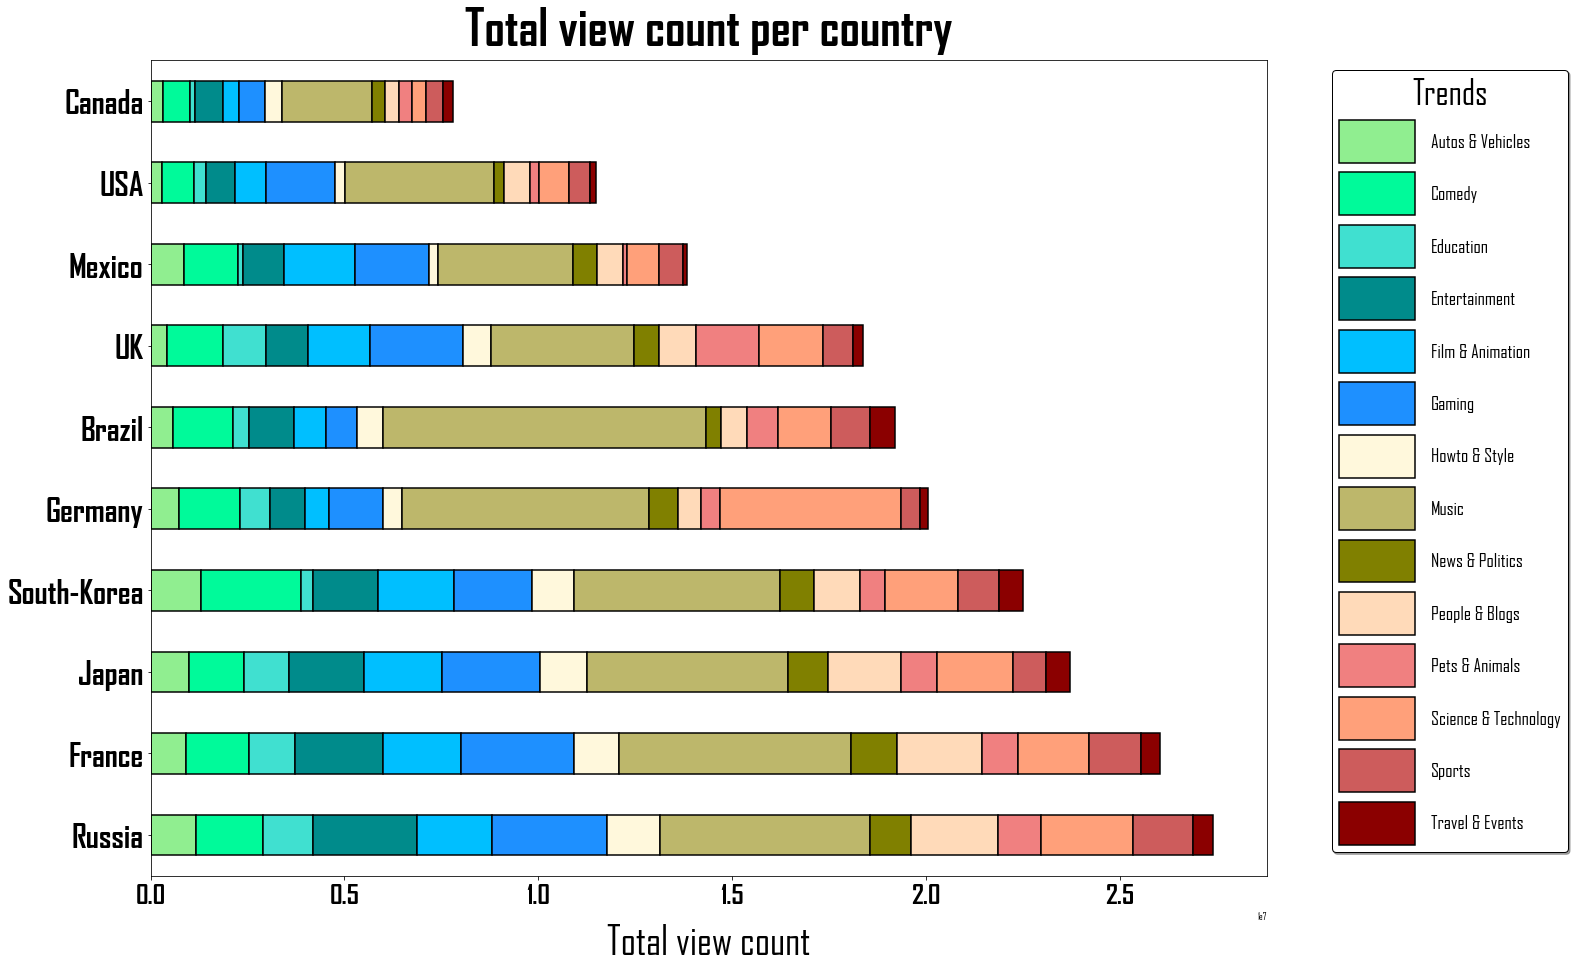

In [21]:
'''
------------------------------Comparing country results - VIEW_COUNT --------------------------------
'''

from matplotlib.font_manager import FontProperties

# Setting Parameters
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1
fontP = FontProperties()

#colors = ["palevioletred","teal","sandybrown","burlywood","khaki","olive",
#          "hotpink","aquamarine","lightcoral","slateblue","violet","plum","grey","springgreen"]


colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue",
          "dodgerblue","cornsilk","darkkhaki","olive","peachpuff","lightcoral",
          "lightsalmon","indianred","darkred"]

# This is the dataframe
countries_view_count_ordered.T.plot(kind="barh",stacked=True,
                                    color=colors,linewidth=1.5,edgecolor="k")

# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_likes=["Russia","France","Japan","South-Korea","Germany","Brazil","UK",
                "Mexico","USA","Canada"]

plt.yticks(positions,labels=labels_likes,size=32,fontweight="bold")
plt.xticks(size=27,fontweight="bold")
plt.title("Total view count per country",size=50,fontweight="bold",pad=15)
plt.xlabel("Total view count",size=40,labelpad=15)
 
# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

In [22]:
'''
Checking top trends for each country - can be used to reduce trend # in graphs
'''
top_trends_dislikes=[]
for clmn in countries_dislike_ordered.columns:
    top_trends_dislikes.append(countries_dislike_ordered[clmn].nlargest(3).index)
# Top trends for dislikes: Music",Gaming,People & Blogs,Comedy,Science & Technology

top_trends_likes=[]
for clmn in countries_like_ordered.columns:
    top_trends_likes.append(countries_like_ordered[clmn].nlargest(3).index)
    
top_trends_likes
# Top trends for likes: Music, Comedy, Entertainment, Gaming, Science & Tech

[Index(['Music', 'Comedy', 'Entertainment'], dtype='object', name='trend'),
 Index(['Music', 'Entertainment', 'Comedy'], dtype='object', name='trend'),
 Index(['Music', 'Comedy', 'Gaming'], dtype='object', name='trend'),
 Index(['Music', 'Comedy', 'Entertainment'], dtype='object', name='trend'),
 Index(['Music', 'Comedy', 'Gaming'], dtype='object', name='trend'),
 Index(['Music', 'Comedy', 'Gaming'], dtype='object', name='trend'),
 Index(['Music', 'Comedy', 'Entertainment'], dtype='object', name='trend'),
 Index(['Music', 'Science & Technology', 'Comedy'], dtype='object', name='trend'),
 Index(['Music', 'Comedy', 'Gaming'], dtype='object', name='trend'),
 Index(['Music', 'Entertainment', 'Comedy'], dtype='object', name='trend')]

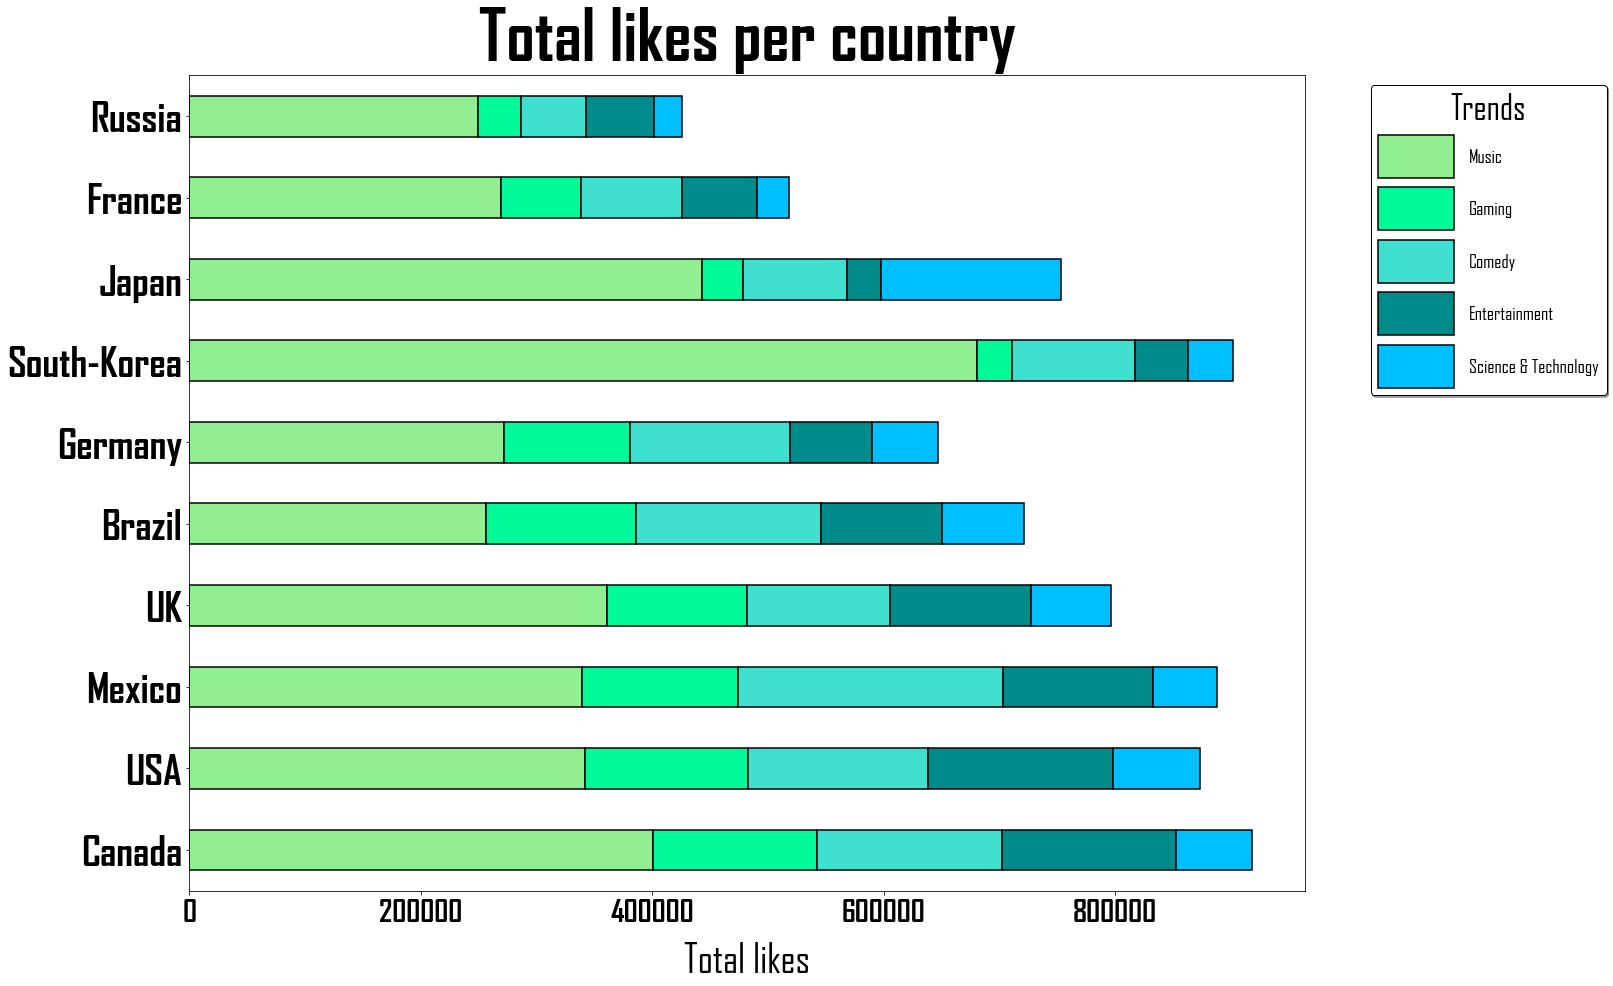

In [23]:
'''
                                SAME GRAPH WITH LESS TRENDS
                                  MORE EASIER TO READ IMO
                                
------------------------------Comparing country results - LIKES ----------------------------------
'''

from matplotlib.font_manager import FontProperties

# Setting Parameters
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1
fontP = FontProperties()

#colors = ["palevioletred","teal","sandybrown","burlywood","khaki","olive",
#          "hotpink","aquamarine","lightcoral","slateblue","violet","plum","grey","springgreen"]


colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue"]

# This is the dataframe
countries_like_ordered.T[["Music","Gaming","Comedy",
                             "Entertainment","Science & Technology"]].plot(
    kind="barh",stacked=True,color=colors,linewidth=1.5,edgecolor="k")

# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_likes=["Russia","France","Japan","South-Korea","Germany","Brazil","UK",
                "Mexico","USA","Canada"]

plt.yticks(positions,labels=labels_likes[::-1],size=41,fontweight="bold")
plt.xticks(size=30,fontweight="bold")
plt.title("Total likes per country",size=70,fontweight="bold",pad=15)
plt.xlabel("Total likes",size=40,labelpad=15)
 
# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

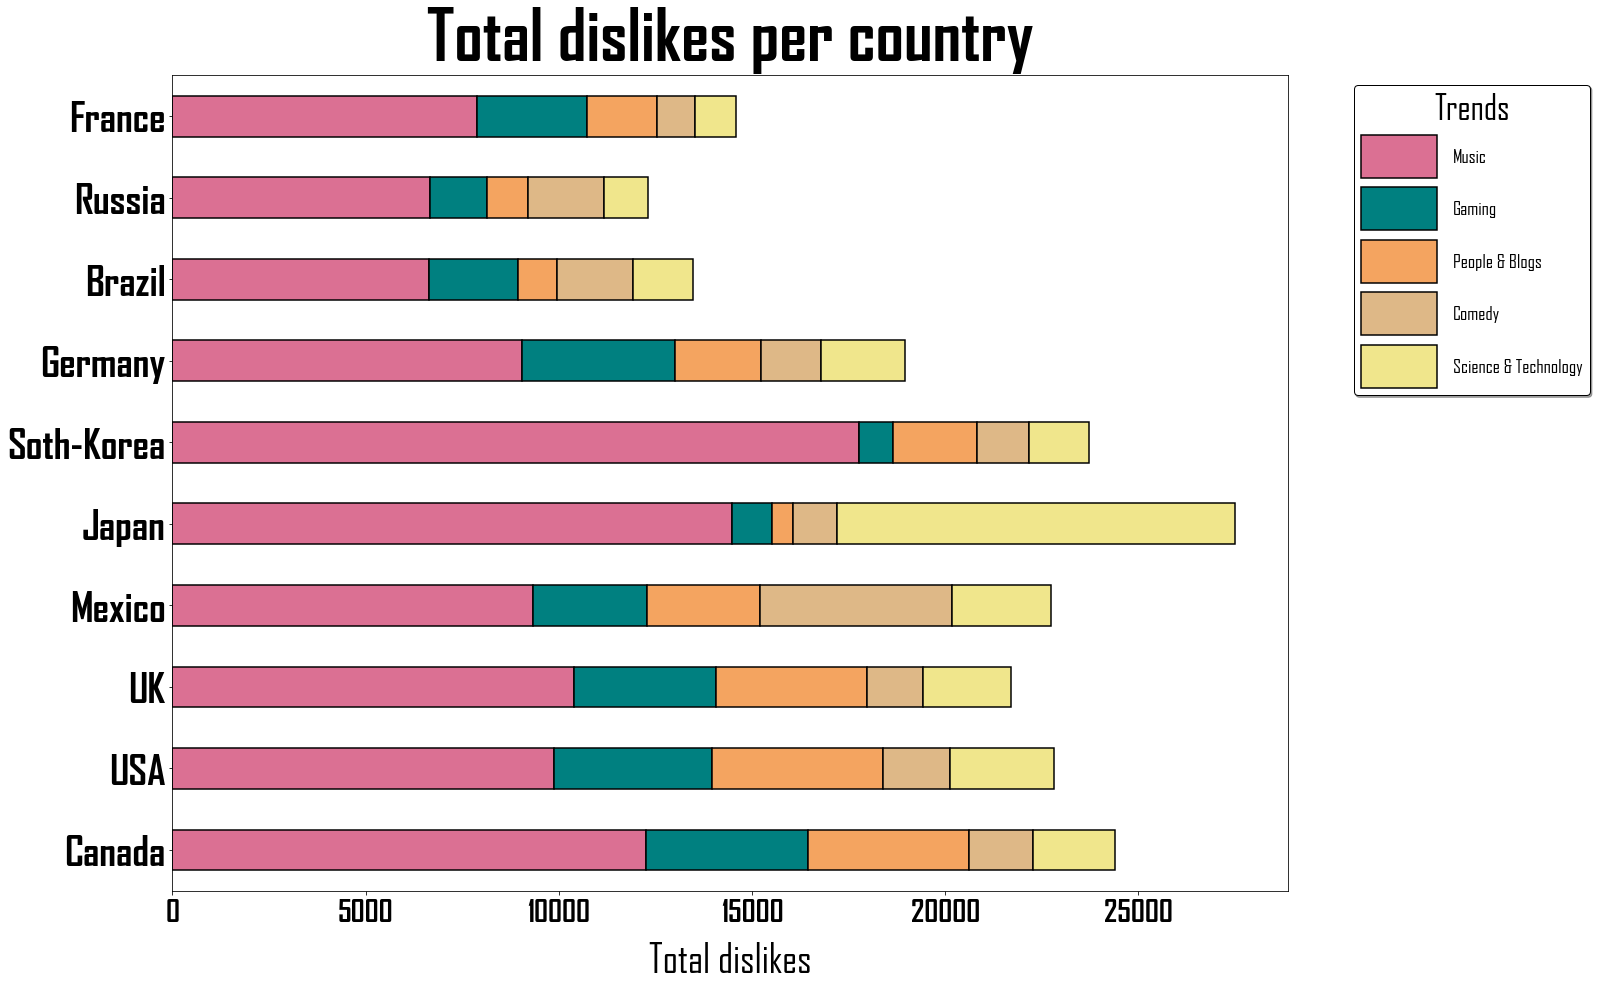

In [24]:
'''
                                SAME GRAPH WITH LESS TRENDS
                                  MORE EASIER TO READ IMO
                                  
------------------------------Comparing country results - DISLIKES ----------------------------------
'''

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1


colors = ["palevioletred","teal","sandybrown","burlywood","khaki"]


#colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue",
#          "dodgerblue","cornsilk","darkkhaki","olive","peachpuff","lightcoral",
#          "lightsalmon","indianred","darkred"]


# This is the dataframe
countries_dislike_ordered.T[["Music","Gaming","People & Blogs",
                             "Comedy","Science & Technology"]].plot(
    kind="barh",stacked=True,color=colors,linewidth=1.5,edgecolor="k")



# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_dislikes=["Canada","USA","UK","Mexico","Japan","Soth-Korea","Germany",
                "Brazil","Russia","France"]

plt.yticks(positions,labels=labels_dislikes,size=41,fontweight="bold")
plt.xticks(size=30,fontweight="bold")
plt.title("Total dislikes per country",size=70,fontweight="bold",pad=15)
plt.xlabel("Total dislikes",size=40,labelpad=15)
 

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

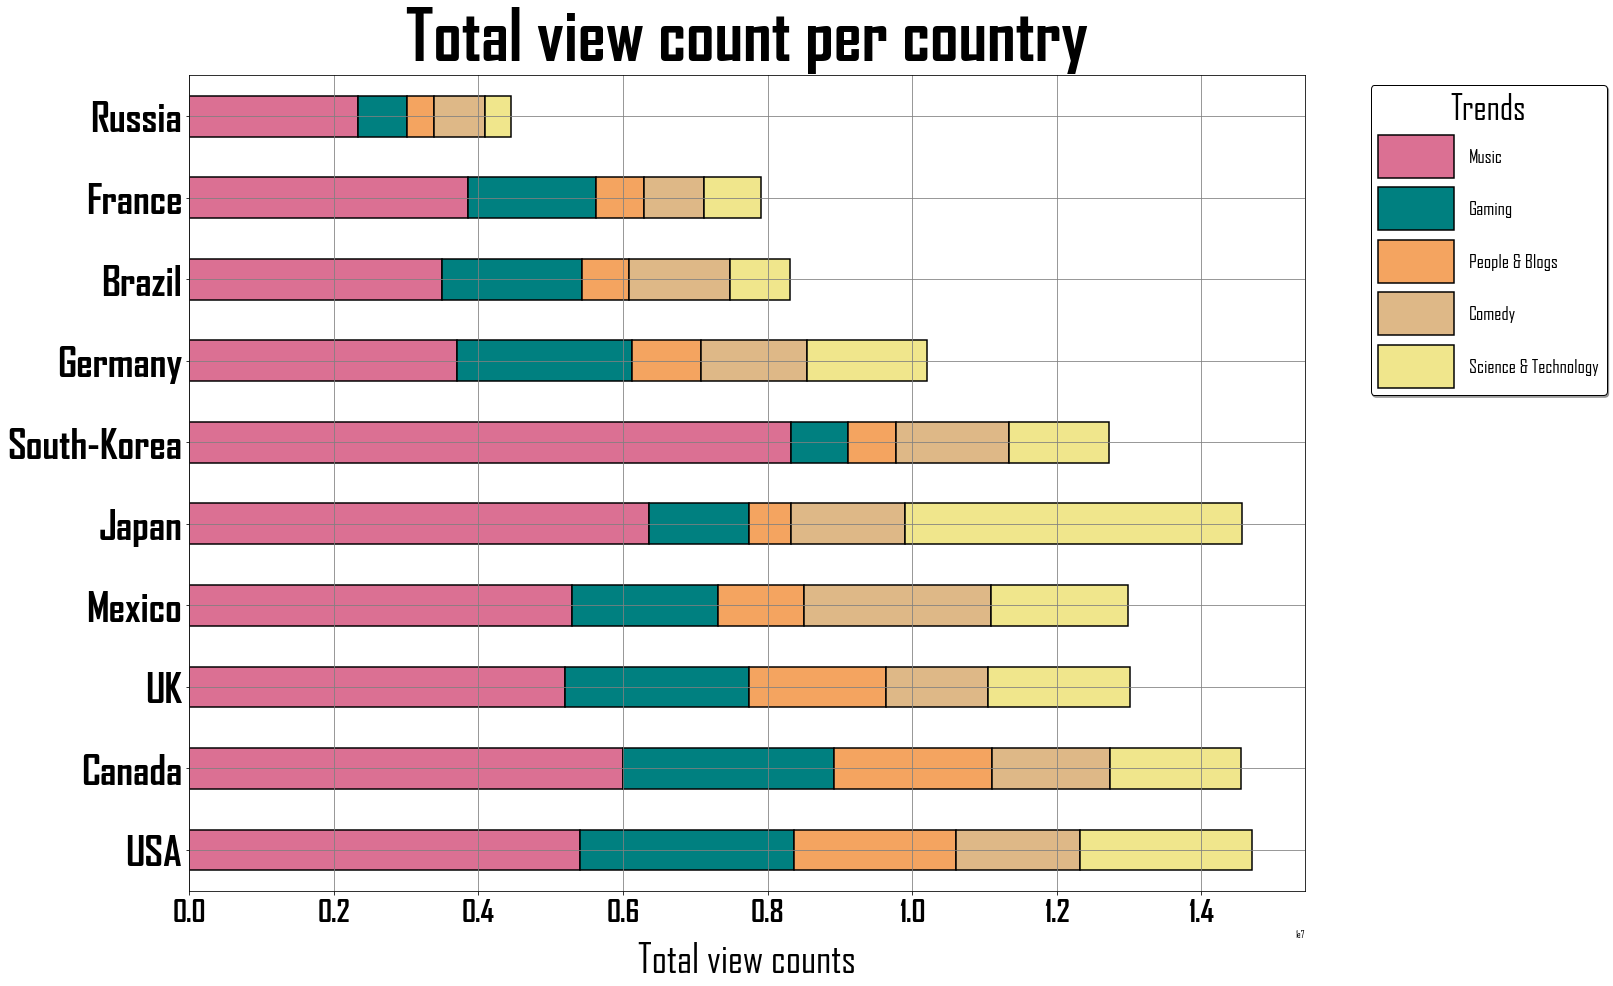

In [25]:
'''
                                SAME GRAPH WITH LESS TRENDS
                                  MORE EASIER TO READ IMO
                                  
------------------------------Comparing country results - VIEW-COUNTS ------------------------------
'''

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1


colors = ["palevioletred","teal","sandybrown","burlywood","khaki"]


#colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue",
#          "dodgerblue","cornsilk","darkkhaki","olive","peachpuff","lightcoral",
#          "lightsalmon","indianred","darkred"]


# This is the dataframe
countries_view_count_ordered.T[["Music","Gaming","People & Blogs",
                             "Comedy","Science & Technology"]].plot(
    kind="barh",stacked=True,color=colors,linewidth=1.5,edgecolor="k")



# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_view_counts=["Russia","France","Brazil","Germany","South-Korea",
                    "Japan","Mexico","UK","Canada","USA"]

plt.yticks(positions,labels=labels_view_counts[::-1],size=41,fontweight="bold")
plt.xticks(size=30,fontweight="bold")
plt.title("Total view count per country",size=70,fontweight="bold",pad=15)
plt.xlabel("Total view counts",size=40,labelpad=15)
 

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

plt.grid(color="gray")

## Statistical Analysis

#### Confidence Intervals

In [28]:
"""
Next we decided to use confidence intervals to determine the mean of our data. 
"""

'\nNext we decided to use confidence intervals to determine the mean of our data. \n'

In [29]:
us_likes = data_us_unique['likes']
us_likes_stdev = us_likes.std()
degree_freedom = len(us_likes) - 1
t = stats.t.interval(0.95, degree_freedom)[1]

# Terms
mean = us_likes.mean()
std_sample = np.sqrt(abs(np.sum((us_likes - mean)**2) / (1-len(us_likes))))
marg_of_error = std_sample / np.sqrt(len(us_likes))
con_int = [mean - (t * marg_of_error) , mean + (t * marg_of_error)]

print('With 95% confidence, the true mean lies in the inverval:', con_int)

#add the middle point

With 95% confidence, the true mean lies in the inverval: [134982.77747488924, 178463.03051220236]


In [30]:
"""
Finally, we decided to test another hypothesis related to engagement between countries
"""

'\nFinally, we decided to test another hypothesis related to engagement between countries\n'

#### Hypothesis 


#### Hypothesis 1

View counts are largely similar for the US and UK

H0: mu UK == mu US

H1: mu UK != mu US

In [32]:
"""
First we took a look at the numbers to understand the data set a little better
"""

'\nFirst we took a look at the numbers to understand the data set a little better\n'

In [33]:
data_gb_unique['view_count'].mean()

2128238.6995253745

In [34]:
data_gb_unique['view_count'].median()

687993.0

In [35]:
data_gb_unique['view_count'].std()

7214438.945745977

In [36]:
data_us_unique['view_count'].mean()

2799942.168212989

In [37]:
data_us_unique['view_count'].median()

1076658.0

In [38]:
data_us_unique['view_count'].std()

8305210.195639507

In [39]:
"""
We noticed a big difference in the mean and median and suspected this was due to outliers, so we
plotted these on a scatter plot.
"""

'\nWe noticed a big difference in the mean and median and suspected this was due to outliers, so we\nplotted these on a scatter plot.\n'

<AxesSubplot:xlabel='video_id', ylabel='view_count'>

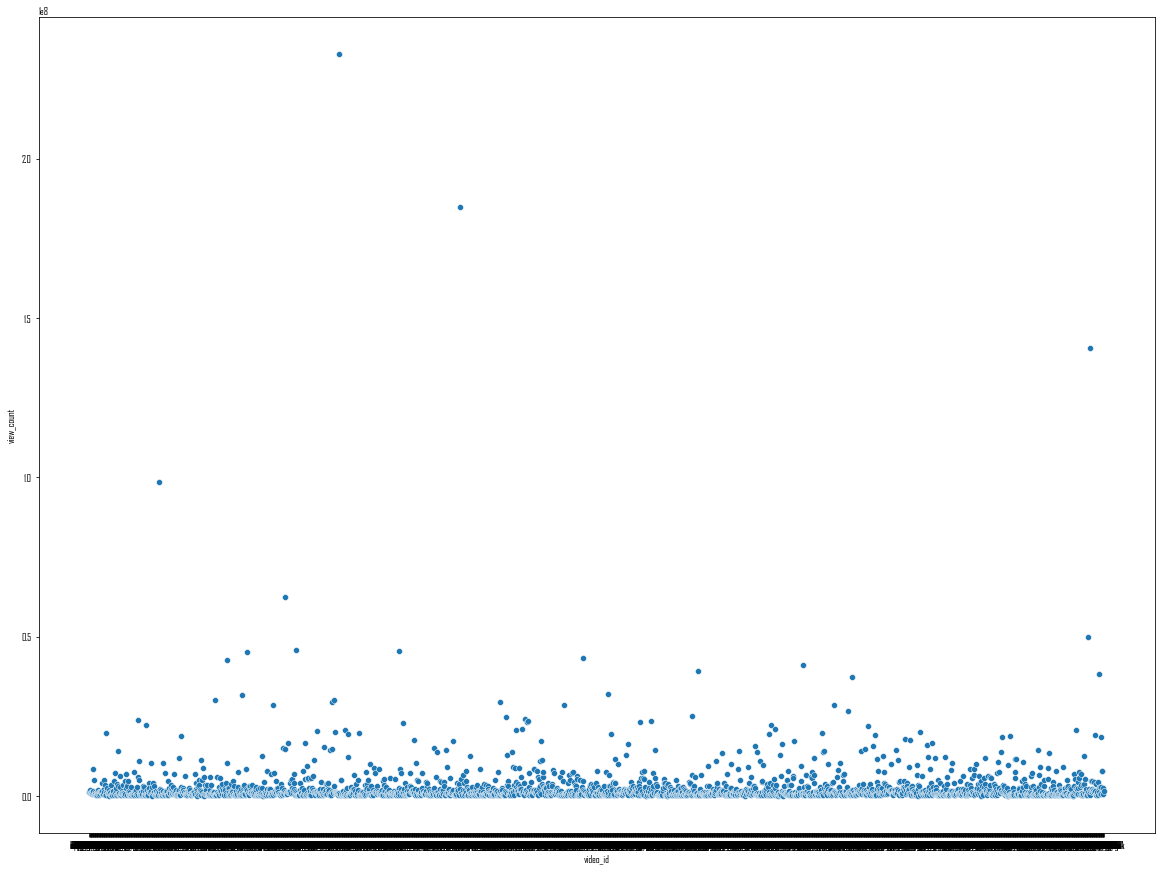

In [40]:
sns.scatterplot(data = data_us_unique, x = 'video_id', y = 'view_count')

<AxesSubplot:xlabel='video_id', ylabel='view_count'>

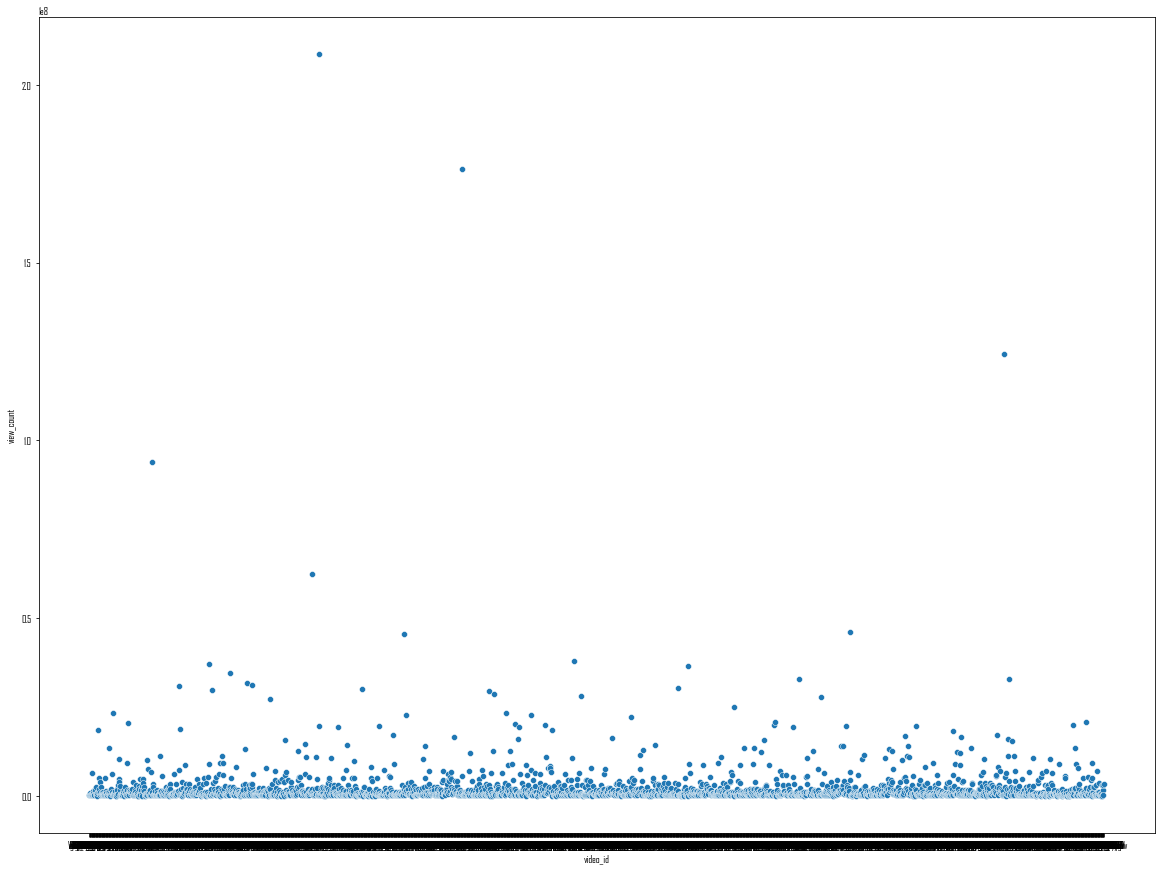

In [41]:
sns.scatterplot(data = data_gb_unique, x = 'video_id', y = 'view_count')

In [42]:
"""
We removed the top 5 values for both samples as we beleived that these were skewing the data. 
"""

'\nWe removed the top 5 values for both samples as we beleived that these were skewing the data. \n'

In [43]:
data_us_updated = data_us_unique['view_count'].sort_values(ascending = False).reset_index()
data_us_updated.head(10)

,index,view_count
0,3358,232649205
1,4980,184778248
2,11764,140685439
3,985,98442414
4,2762,62496726
5,11761,49814886
6,2787,45893190
7,3992,45596902
8,2361,45086708
9,6597,43394819


In [44]:
data_us_updated = data_us_updated.drop(index = [0, 1, 2, 3, 4])
data_us_updated.head(3)

,index,view_count
5,11761,49814886
6,2787,45893190
7,3992,45596902


In [45]:
data_gb_updated = data_gb_unique['view_count'].sort_values(ascending = False).reset_index()
data_gb_updated.head(10)

,index,view_count
0,2953,208581468
1,4797,176467113
2,11361,124180499
3,799,93935173
4,2792,62496726
5,9392,45950142
6,3994,45596902
7,6194,37819586
8,1557,37135897
9,7732,36413172


In [46]:
data_gb_updated = data_gb_updated.drop(index = [0, 1, 2, 3, 4])
data_gb_updated.head(3)

,index,view_count
5,9392,45950142
6,3994,45596902
7,6194,37819586


In [47]:
"""
Next we tested our hypotheses using a t test. 
"""

'\nNext we tested our hypotheses using a t test. \n'

In [49]:
from scipy.stats import ttest_ind

ttest_ind(data_us_updated['view_count'], data_gb_updated['view_count'], equal_var=False)

Ttest_indResult(statistic=5.22991057708366, pvalue=1.7668288467208737e-07)

A p value of zero means null hypothesis can be rejected and therefore we can assume mean is greater than 200k for likes. However, we recognise that a p value of zero is almost imopssible in the real world and this hypothesis doesn't really tell us anything meaningful. 

# APPENDIX

Sports engagement in the US is similar to the UK


H0: avg likes US Sports != avg likes UK

H1: avg likes US Sports == avg likes UK

In [ ]:
"""
We spent some time cleaning the data and removing outliers as before
"""

In [ ]:
data_us_sport = data_us_unique[['trend', 'view_count']]
data_us_sport = data_us_sport[data_us_sport['trend']== 'Sports']
data_us_sport = data_us_sport.sort_values('view_count', ascending = False)
data_us_sport.head(10)


In [ ]:
sns.scatterplot(data = data_us_sport)

In [ ]:
data_us_sport_updated = data_us_sport.reset_index()
data_us_sport_updated = data_us_sport_updated.drop(index = [0, 1, 2, 3])
data_us_sport_updated.head(10)

In [ ]:
data_gb_sport = data_gb_unique[['trend', 'view_count']]
data_gb_sport = data_gb_sport[data_gb_sport['trend']== 'Sports']
data_gb_sport = data_gb_sport.sort_values('view_count', ascending = False)
data_gb_sport.head(10)



In [ ]:
sns.scatterplot(data = data_gb_sport)

In [ ]:
data_gb_sport_updated = data_gb_sport.reset_index()
data_gb_sport_updated = data_gb_sport_updated.drop(index = [0, 1, 2])
data_us_sport_updated.head(10)

In [ ]:
ttest_ind(data_us_sport_updated['view_count'], data_gb_sport_updated['view_count'], equal_var=False)

P value is much smaller than the critical alpha value so we can reject the null hypothesis
Assume therefore that sports engagement is statisticall similar in the UK and US.

In [ ]:
data_us_sport_updated['view_count'].mean()

In [ ]:
data_gb_sport_updated['view_count'].mean()

In [ ]:
'''
We can also check each trend one by one 
'''
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['legend.handlelength'] = 4
plt.rcParams['legend.handleheight'] = 3.1


colors = ["palevioletred","teal","sandybrown","burlywood","khaki"]


#colors = ["lightgreen","mediumspringgreen","turquoise","darkcyan","deepskyblue",
#          "dodgerblue","cornsilk","darkkhaki","olive","peachpuff","lightcoral",
#          "lightsalmon","indianred","darkred"]


# This is the dataframe
countries_view_count_ordered.T[["Sports"]].plot(
    kind="barh",stacked=True,color=colors,linewidth=1.5,edgecolor="k")



# Adjusting xticks and yticks
positions = (0,1,2,3,4,5,6,7,8,9)
labels_view_counts=["Russia","France","Brazil","Germany","South-Korea",
                    "Japan","Mexico","UK","Canada","USA"]

plt.yticks(positions,labels=labels_view_counts[::-1],size=41,fontweight="bold")
plt.xticks(size=30,fontweight="bold")
plt.title("Total view count per country",size=70,fontweight="bold",pad=15)
plt.xlabel("Total view counts",size=40,labelpad=15)
 

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',prop={"size":19},
           shadow=True,facecolor="white",edgecolor="k",title="Trends",title_fontsize=35)

plt.grid(color="gray")

### Hypothesis Testing

In [ ]:
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from sklearn.metrics import auc

#### Hypothesis 1

In Germany, quarter of total views on trending videos is for Sports category.

In [ ]:
'''
H0 => p = 0.25
H1 => p != 0.25
'''

In [51]:
data_de_unique_sports  = data_de_unique[data_de_unique["trend"]=="Sport"]

test statitics:  -32.562759915789286
Alpha Left Tail:  -1.9599639845400545
Alpha Right Tail:  1.959963984540054
Null hytpothesis is rejected


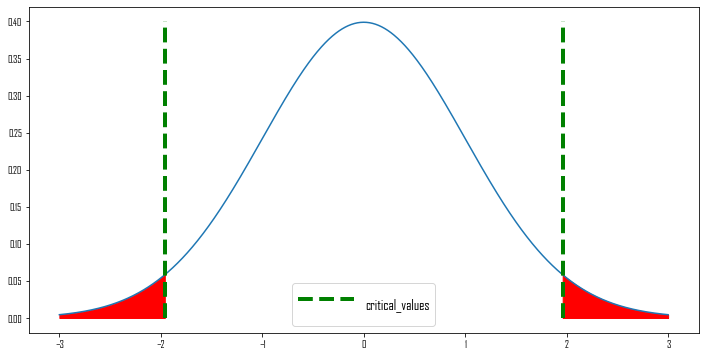

In [52]:
confidence_level = 0.95
alpha = 1- confidence_level
sample_proportion = (data_de_unique_sports["view_count"].sum()/
                     data_de_unique["view_count"].sum())#*100
mu_proportion = 0.25
sample_size = len(data_de_unique)

z = (sample_proportion-mu_proportion) / np.sqrt((0.25*0.75)/sample_size)
print("test statitics: ",z)


# Two-sided hypothesis testing
normal = norm(loc = 0, scale = 1) 

alpha_left = 0.025
alpha_left = normal.ppf(alpha_left)
print("Alpha Left Tail: ",alpha_left)

alpha_right = 1 - 0.025
alpha_right = normal.ppf(alpha_right)
print('Alpha Right Tail: ', alpha_right)


#drawing the graph

plt.rcParams["figure.figsize"]=(12,6)
fig, ax = plt.subplots(1,1)
x = np.linspace(-3,3,1000)
y = normal.pdf(x)
ax.plot(x,y)
plt.plot([alpha_right, alpha_right], [0, 0.4], 'k--', lw=4, color='green',label="critical_values")
plt.legend(loc="best",prop={"size":14})
plt.plot([alpha_left, alpha_left], [0, 0.4], 'k--', lw=4, color='green')
plt.fill_between(x,y, where = x >= alpha_right, color='r')
plt.fill_between(x,y, where = x <=alpha_left, color='r')

'''
Since test statistics are waay smaller then left critical value, it is in the rejection area, 
therefore we do reject the null hypothesis and accept hypothesis 1 which implies that
in germany quarter of total views on trending videos are not belong to sports category.
'''
if (z < alpha_right) & (z > alpha_left):
    print("Support null hypothesis")
else:
    print("Null hytpothesis is rejected")

In [ ]:
'''
Creating Subplots Function (plot_drawer)
- All countries will be drawn once applied
'''

plot_columns = ["view_count","likes","dislikes","comment_count"]
plot_colors = ["lightblue","green","red","darkorange"]
plot_titles = ["View counts per Trend","Likes per Trend",
               "Dislikes per Trend","Comment counts per Trend"]
plot_titles_countries = ["UK","France","USA","Russia","Germany","Canada",
                         "SouthKorea","Japan","Brazil","Mexico"]



def plot_drawer(df_pivot,plot_cols,plot_titles):
    plt.rc('font', weight='bold')
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    plt.rcParams["figure.figsize"] = (14,40)
    
    fig1, ax = plt.subplots(4,1)
    

    for subplot_index in range(0,4):
        
        df_pivot[[plot_columns[subplot_index]]].sort_values(
        by=plot_columns[subplot_index],ascending=False).plot.barh(
        ax=ax[subplot_index],stacked=True,edgecolor="k",lw=1,color=plot_colors[subplot_index])
        
        
        ax[subplot_index].set_title(plot_titles[subplot_index],size=28,
                                    fontweight="bold",pad=10,color="k")
    
    
        legend_fix = mpatches.Patch(color=plot_colors[subplot_index], 
                                      label=plot_columns[subplot_index])
        ax[subplot_index].legend(handles=[legend_fix],edgecolor="k",prop={"size":22})
        
        ax[subplot_index].grid(True,color="k",ls=":")
        
    
        #only for this one
        ax[0].get_xaxis().get_major_formatter().set_scientific(False)

In [ ]:
'''
Applying plot function & pivot_table function to all databases;
'''
plot_titles_countries = {1:"UK",2:"France",3:"USA",4:"Russia",5:"Germany",6:"Canada",
                         7:"SouthKorea",8:"Japan",9:"Brazil",10:"Mexico"}


# Creating fake plot for title
fig2, ax = plt.subplots(1,1,figsize=(20,1))
ax.plot([1,1],[1,1],label="UK")
ax.legend(loc="center",edgecolor="k",prop={"size":55})
plt.axis('off')


c = 1
for unique_country in data_unique_countries:
    plot_drawer(categorized_pivot_table(unique_country),plot_colors,plot_titles)
    
    # Creating fake plots as title
    if c < 10:
        fig2, ax = plt.subplots(1,1,figsize=(20,1))
        ax.plot([1,1],[1,1],label=plot_titles_countries[c+1])
        ax.legend(loc="center",edgecolor="k",prop={"size":55})
        plt.axis('off')
        c += 1